In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from src.config import *


In [12]:
receptors = pd.read_csv('data/design_matrices/high_quality/all_pert_binary_liana.csv', index_col = 0).columns

In [5]:
lrint =pd.read_csv(LIG_REC_DF, index_col = 0)

In [16]:
import holoviews as hv
from holoviews import opts

In [19]:
lrint = lrint[["source_genesymbol", "target_genesymbol"]]
lrint.columns = ["ligand", "receptor"]

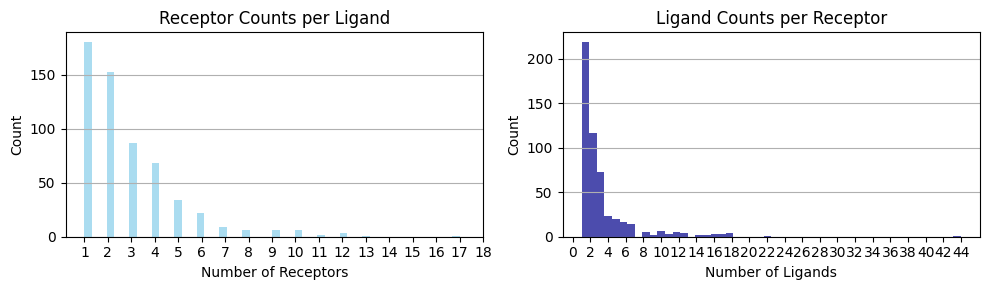

In [57]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Histogram for ligand count
axes[0].hist(lrint.groupby('ligand')['receptor'].count(), bins=50, color='skyblue', alpha=0.7)
axes[0].set_title('Receptor Counts per Ligand')
axes[0].set_xlabel('Number of Receptors')
axes[0].set_ylabel('Count')
axes[0].grid(axis = 'y')
# xticklabels should be more frequently shown
axes[0].set_xticks(np.arange(1, 19, 1))

# Histogram for receptor count
axes[1].hist(lrint.groupby('receptor')['ligand'].count(), bins=50, color='darkblue', alpha=0.7)
axes[1].set_title('Ligand Counts per Receptor')
axes[1].set_xlabel('Number of Ligands')
axes[1].set_ylabel('Count')
axes[1].grid(axis = 'y')
axes[1].set_xticks(np.arange(0, 45, 2))
plt.savefig('figures/revision/2_4_ligand_receptor_counts.png', bbox_inches='tight', dpi = 300)
plt.savefig('figures/revision/2_4_ligand_receptor_counts.pdf', bbox_inches='tight', dpi = 300)
plt.savefig('figures/revision/2_4_ligand_receptor_counts.jpg', bbox_inches='tight', dpi = 300)
plt.tight_layout()
plt.show()

<Axes: xlabel='receptor', ylabel='Density'>

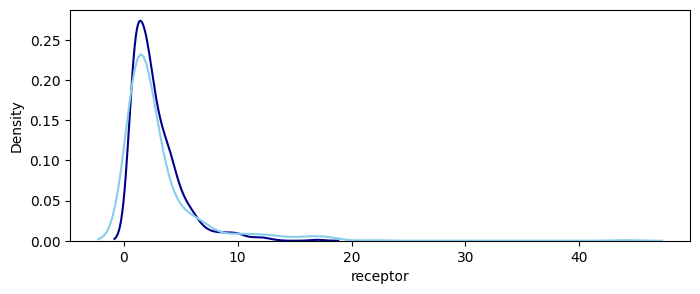

In [40]:
fig, ax = plt.subplots(figsize=(8, 3))
sns.kdeplot(lrint.groupby('ligand')['receptor'].count(), color = 'darkblue', label = 'ligand')
sns.kdeplot(lrint.groupby('receptor')['ligand'].count(),  color = 'skyblue', label = 'receptor')

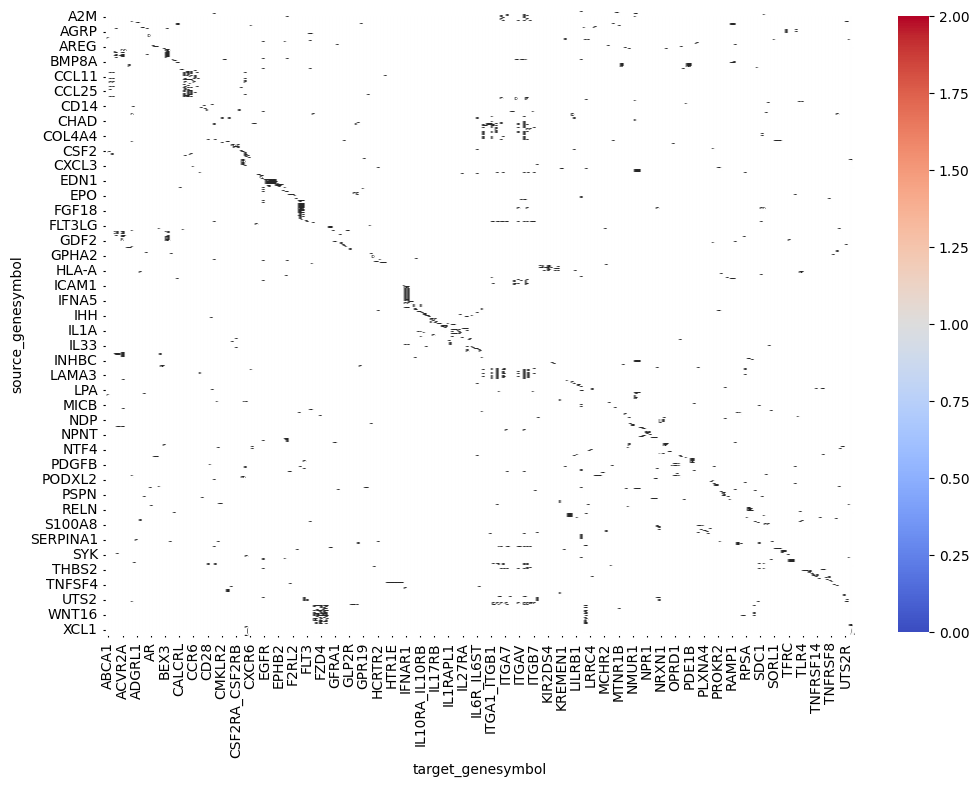

In [15]:

pivot = lrint.groupby(["liagnd", "receptor"]).size().unstack(fill_value=0) 
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, cmap="coolwarm", annot=True, fmt="d")
plt.show()
